Build a regression model.

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [2]:
#grab dataframe from csv
df=pd.read_csv('elevation_comparison.csv')

In [30]:
#Create df with only numerical columns
num_df = df.select_dtypes(include=['number'])
#drop all columns that are I do not want to investigate: lat long, variables that do not change within dataframe
num_df.drop(['longitude_y','latitude_y','latitude_x','longitude_x','extra_last_updated','extra_renting','extra_returning','ebike_use_ratio'], axis=1, inplace=True) #drop lat longs I'm not sure the mechanism of how they would translate to distance
#create a dataframe of variables that are distinctive (that is represent a unique property not directly related to another column) and related to elevation
elevation_vars=num_df[['free_reg_bikes','venue_range','elevation','venue_id_count','average_elevation_delta']]
num_df

empty_slots  free_bikes  extra_ebikes  extra_slots  elevation  \
0              1          13             0           15  32.928356   
1              6           5             0           11  25.925880   
2             12          11             0           23  31.710926   
3             14           0             0           15  30.782372   
4             24           2             1           27  30.175741   
..           ...         ...           ...          ...        ...   
519            5           0             0            5  24.829159   
520            3           5             5            8  84.925842   
521            5           0             0            5  76.045532   
522            9          10             2           19  26.973791   
523           24           3             3           27  82.717949   

     avg_venue_elev_100m  venue_id_count  max_venue_elev  min_venue_elev  \
0              32.567101             5.0       33.525723       31.480896   
1              26.200848            18.0       26.928068       25.611631   
2              31.710926             0.0       31.710926       31.710926   
3              30.878815             1.0       30.878815       30.878815   
4              30.175741             0.0       30.175741       30.175741   
..                   ...             ...             ...             ...   
519            24.829159             0.0       24.829159       24.829159   
520            85.710251             2.0       85.722527       85.697975   
521            76.045532             0.0       76.045532       76.045532   
522            26.973791             0.0       26.973791       26.973791   
523            84.856185             6.0       85.674538       83.181709   

     average_elevation_delta  station_size  free_reg_bikes  venue_range  \
0                   0.361255            14              13     2.044827   
1                  -0.274968            11               5     1.316437   
2                   0.000000            23              11     0.000000   
3                  -0.096443            14               0     0.000000   
4                   0.000000            26               1     0.000000   
..                       ...           ...             ...          ...   
519                 0.000000             5               0     0.000000   
520                -0.784409             8               0     0.024551   
521                 0.000000             5               0     0.000000   
522                 0.000000            19               8     0.000000   
523                -2.138236            27               0     2.492828   

     station_avg_uphill_yes  
0                         1  
1                         0  
2                         1  
3                         0  
4                         1  
..                      ...  
519                       1  
520                       0  
521                       1  
522                       1  
523                       0  

[524 rows x 14 columns]

In [31]:
#run  model containing all variables


y = num_df['free_bikes']
X = num_df.drop(['free_bikes'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.972e+30
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:00:47   Log-Likelihood:                 15735.
No. Observations:                 524   AIC:                        -3.145e+04
Df Residuals:                     513   BIC:                        -3.140e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

In [32]:
#Drop columns related to empty slots as their predictive power is trivial

num_df.drop(['empty_slots','extra_ebikes','extra_slots','free_reg_bikes','station_size'], axis=1, inplace=True)

y = num_df['free_bikes']
X = num_df.drop(['free_bikes'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     4.123
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           0.000468
Time:                        13:00:50   Log-Likelihood:                -1680.5
No. Observations:                 524   AIC:                             3375.
Df Residuals:                     517   BIC:                             3405.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

There is a very large drop in R-squared at this step showing that the variables related to elevation and hilliness do not predict free_bikes well.


In [34]:
#Drop redundant columns: elevation is close to average venue elevation
#the difference is captured in the average_elevation_delta  column
#As such also drop, min max, but keep venue_range

num_df.drop(['avg_venue_elev_100m','min_venue_elev','max_venue_elev','station_avg_uphill_yes'], axis=1, inplace=True)

y = num_df['free_bikes']
X = num_df.drop(['free_bikes'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     6.063
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           8.97e-05
Time:                        13:01:00   Log-Likelihood:                -1680.8
No. Observations:                 524   AIC:                             3372.
Df Residuals:                     519   BIC:                             3393.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Looking at P>|t|

elevation and venue_range are the only variables that where the null hyp for correlation is unlikely. 

The correlation is small. 

There is a good chance the elevation variable is affected by relationships to station size, because there are no large station at high elevations, and larger stations are likely to have more free bikes at any given time

In [35]:
#removing e-bikes, and only looking at regular bikes, does the correlation of elevation related variables increase?

elevation_vars

y = elevation_vars['free_reg_bikes']
X = elevation_vars.drop(['free_reg_bikes'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         free_reg_bikes   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     7.495
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           7.11e-06
Time:                        13:01:09   Log-Likelihood:                -1606.1
No. Observations:                 524   AIC:                             3222.
Df Residuals:                     519   BIC:                             3243.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Yes, the Adj. R-squared increases from 0.037 to 0.047

However this increase in very small

**This may be do to the nature of the citybikes data being a time slice, elevation and hilliness may predict low use stations, which is not the same as free bikes at any given time. Stations that are high use but at an equilibrium of dropping off and returning would look the same as a low use station**

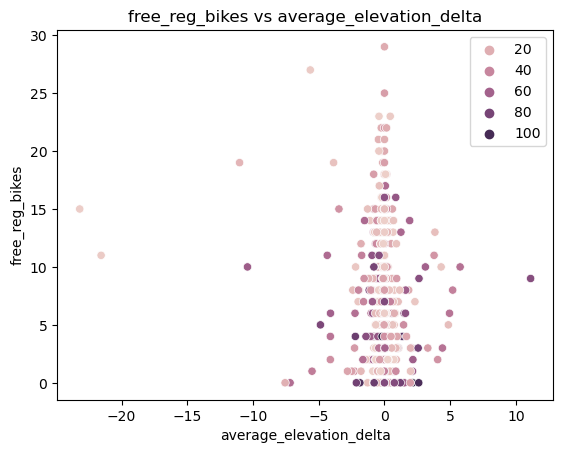

In [121]:
# Create a scatter plot
df=num_df
sns.scatterplot(data=df, x="average_elevation_delta", y="free_reg_bikes", hue="elevation")

# Customize plot attributes
plt.title("free_reg_bikes vs average_elevation_delta")
plt.xlabel("average_elevation_delta")
plt.ylabel("free_reg_bikes")
plt.legend()

# Show the plot
plt.show()

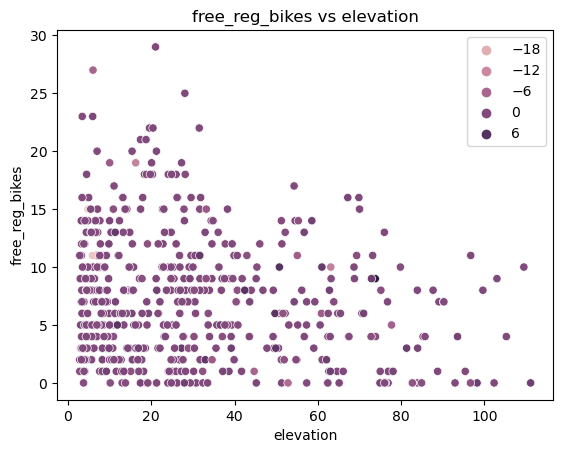

In [122]:
df=num_df
sns.scatterplot(data=df, x="elevation", y="free_reg_bikes", hue="average_elevation_delta")

# Customize plot attributes
plt.title("free_reg_bikes vs elevation")
plt.xlabel("elevation")
plt.ylabel("free_reg_bikes")
plt.legend()

# Show the plot
plt.show()

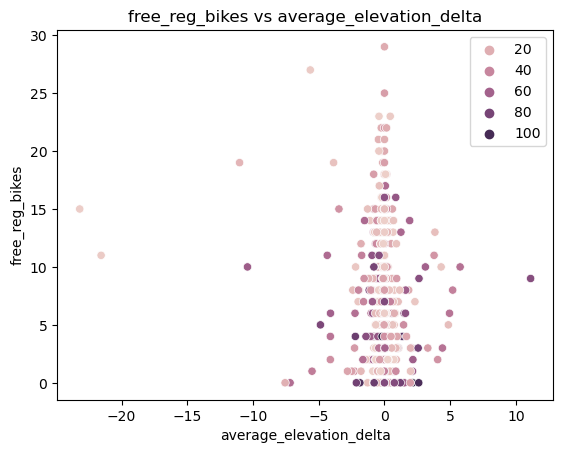

In [123]:
# Create a scatter plot
df=num_df
sns.scatterplot(data=df, x="average_elevation_delta", y="free_reg_bikes", hue="elevation")

# Customize plot attributes
plt.title("free_reg_bikes vs average_elevation_delta")
plt.xlabel("average_elevation_delta")
plt.ylabel("free_reg_bikes")
plt.legend()

# Show the plot
plt.show()

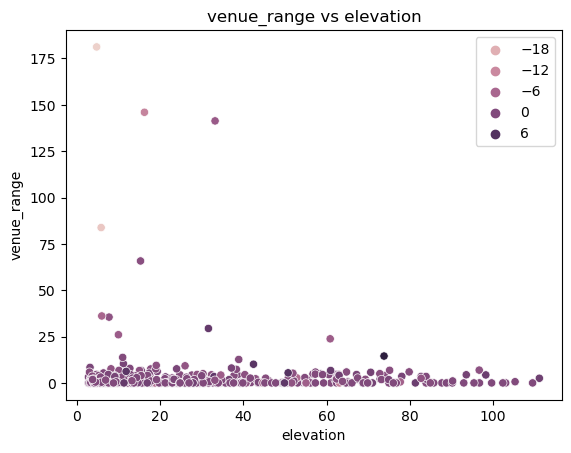

In [124]:
# Create a scatter plot
df=num_df
sns.scatterplot(data=df, x="elevation", y="venue_range", hue="average_elevation_delta")

# Customize plot attributes
plt.title("venue_range vs elevation")
plt.xlabel("elevation")
plt.ylabel("venue_range")
plt.legend()

# Show the plot
plt.show()

# Stretch

How can you turn the regression model into a classification model?

In [23]:


# Assuming elevation_vars is your DataFrame

# Splitting data into features (X) and target (y)
y = elevation_vars['free_reg_bikes']
X = elevation_vars.drop(['free_reg_bikes', 'venue_id_count'], axis=1)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test set
predictions = model.predict(X_test)

# Printing classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.22      0.67      0.33         9
           1       0.12      0.17      0.14         6
           2       0.00      0.00      0.00         0
           3       0.07      0.43      0.12         7
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         3
          17       0.00    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labe